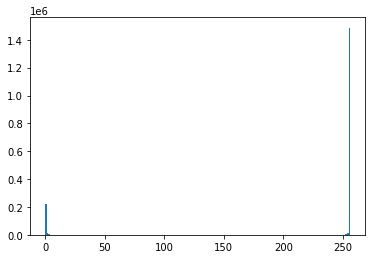

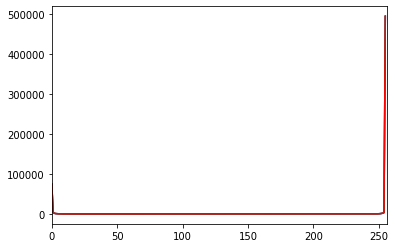

0.13081816783853514
0.1590200533978871
0.1498791568252558
0.07094034474475601


In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image=cv2.imread('D:\Master OpenCV\images/4star.jpg',0)
cv2.imshow('the original photo',image)
cv2.waitKey(0)

target=cv2.imread('D:\Master OpenCV\images/shapestomatch.jpg')
cv2.imshow('target image',target)
cv2.waitKey(0)

#Histogram of target image
histogram = cv2.calcHist([target], [0], None, [256], [0, 256])
plt.hist(target.ravel(), 256, [0, 256]); plt.show()
color = ('b', 'g', 'r')

for i, col in enumerate(color):
    histogram2 = cv2.calcHist([target], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])

plt.show()

target_gray=cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)

ret, image_threhold=cv2.threshold(image,127,255,0)
ret, target_threshold=cv2.threshold(target_gray,127,255,0)

contours,hierachy=cv2.findContours(image_threhold,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

sorted_contours=sorted(contours,key=cv2.contourArea, reverse=True)

image_contour=contours[1]

contours, hierarchy= cv2.findContours(target_threshold, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for a in contours:
    match=cv2.matchShapes(image_contour,a,3,0.0)
    print(match)
    if match<0.15:
        closest_contour=a
    else:
        closest_contour=[]
    
cv2.drawContours(target,[closest_contour],-1,(0,0,255),3)
cv2.imshow('target image with matching',target)
cv2.waitKey(0)
cv2.destroyAllWindows()